In [4]:
import pandas as pd
import numpy as np
from scipy.signal import butter, lfilter
from sklearn.decomposition import FastICA
import matplotlib.pyplot as plt

In [5]:
def get_subject_data(start_series, end_series):
    path = r'C:/Users/tomry/Documents/EEG/train/'
    series = range(start_series, end_series+1)
    subject_data = []
    for serie in series:
        data_filename = path + 'subj1_series%d_data.csv' % serie
        data = pd.read_csv(data_filename)
        subject_data.append(data)
    subj_data = pd.concat(subject_data)
    subj_data.drop('id', inplace=True, axis=1)
    return subj_data.to_numpy()

x = get_subject_data(1, 4)

Filter and downsample the EEG signals

In [6]:
b, a = butter(4, [0.5, 80], fs=500, btype='bandpass')
x = lfilter(b, a, x, axis=0)
x = x[::3, :]

Compute the unmixing matrix, transform x and plot the independent sources

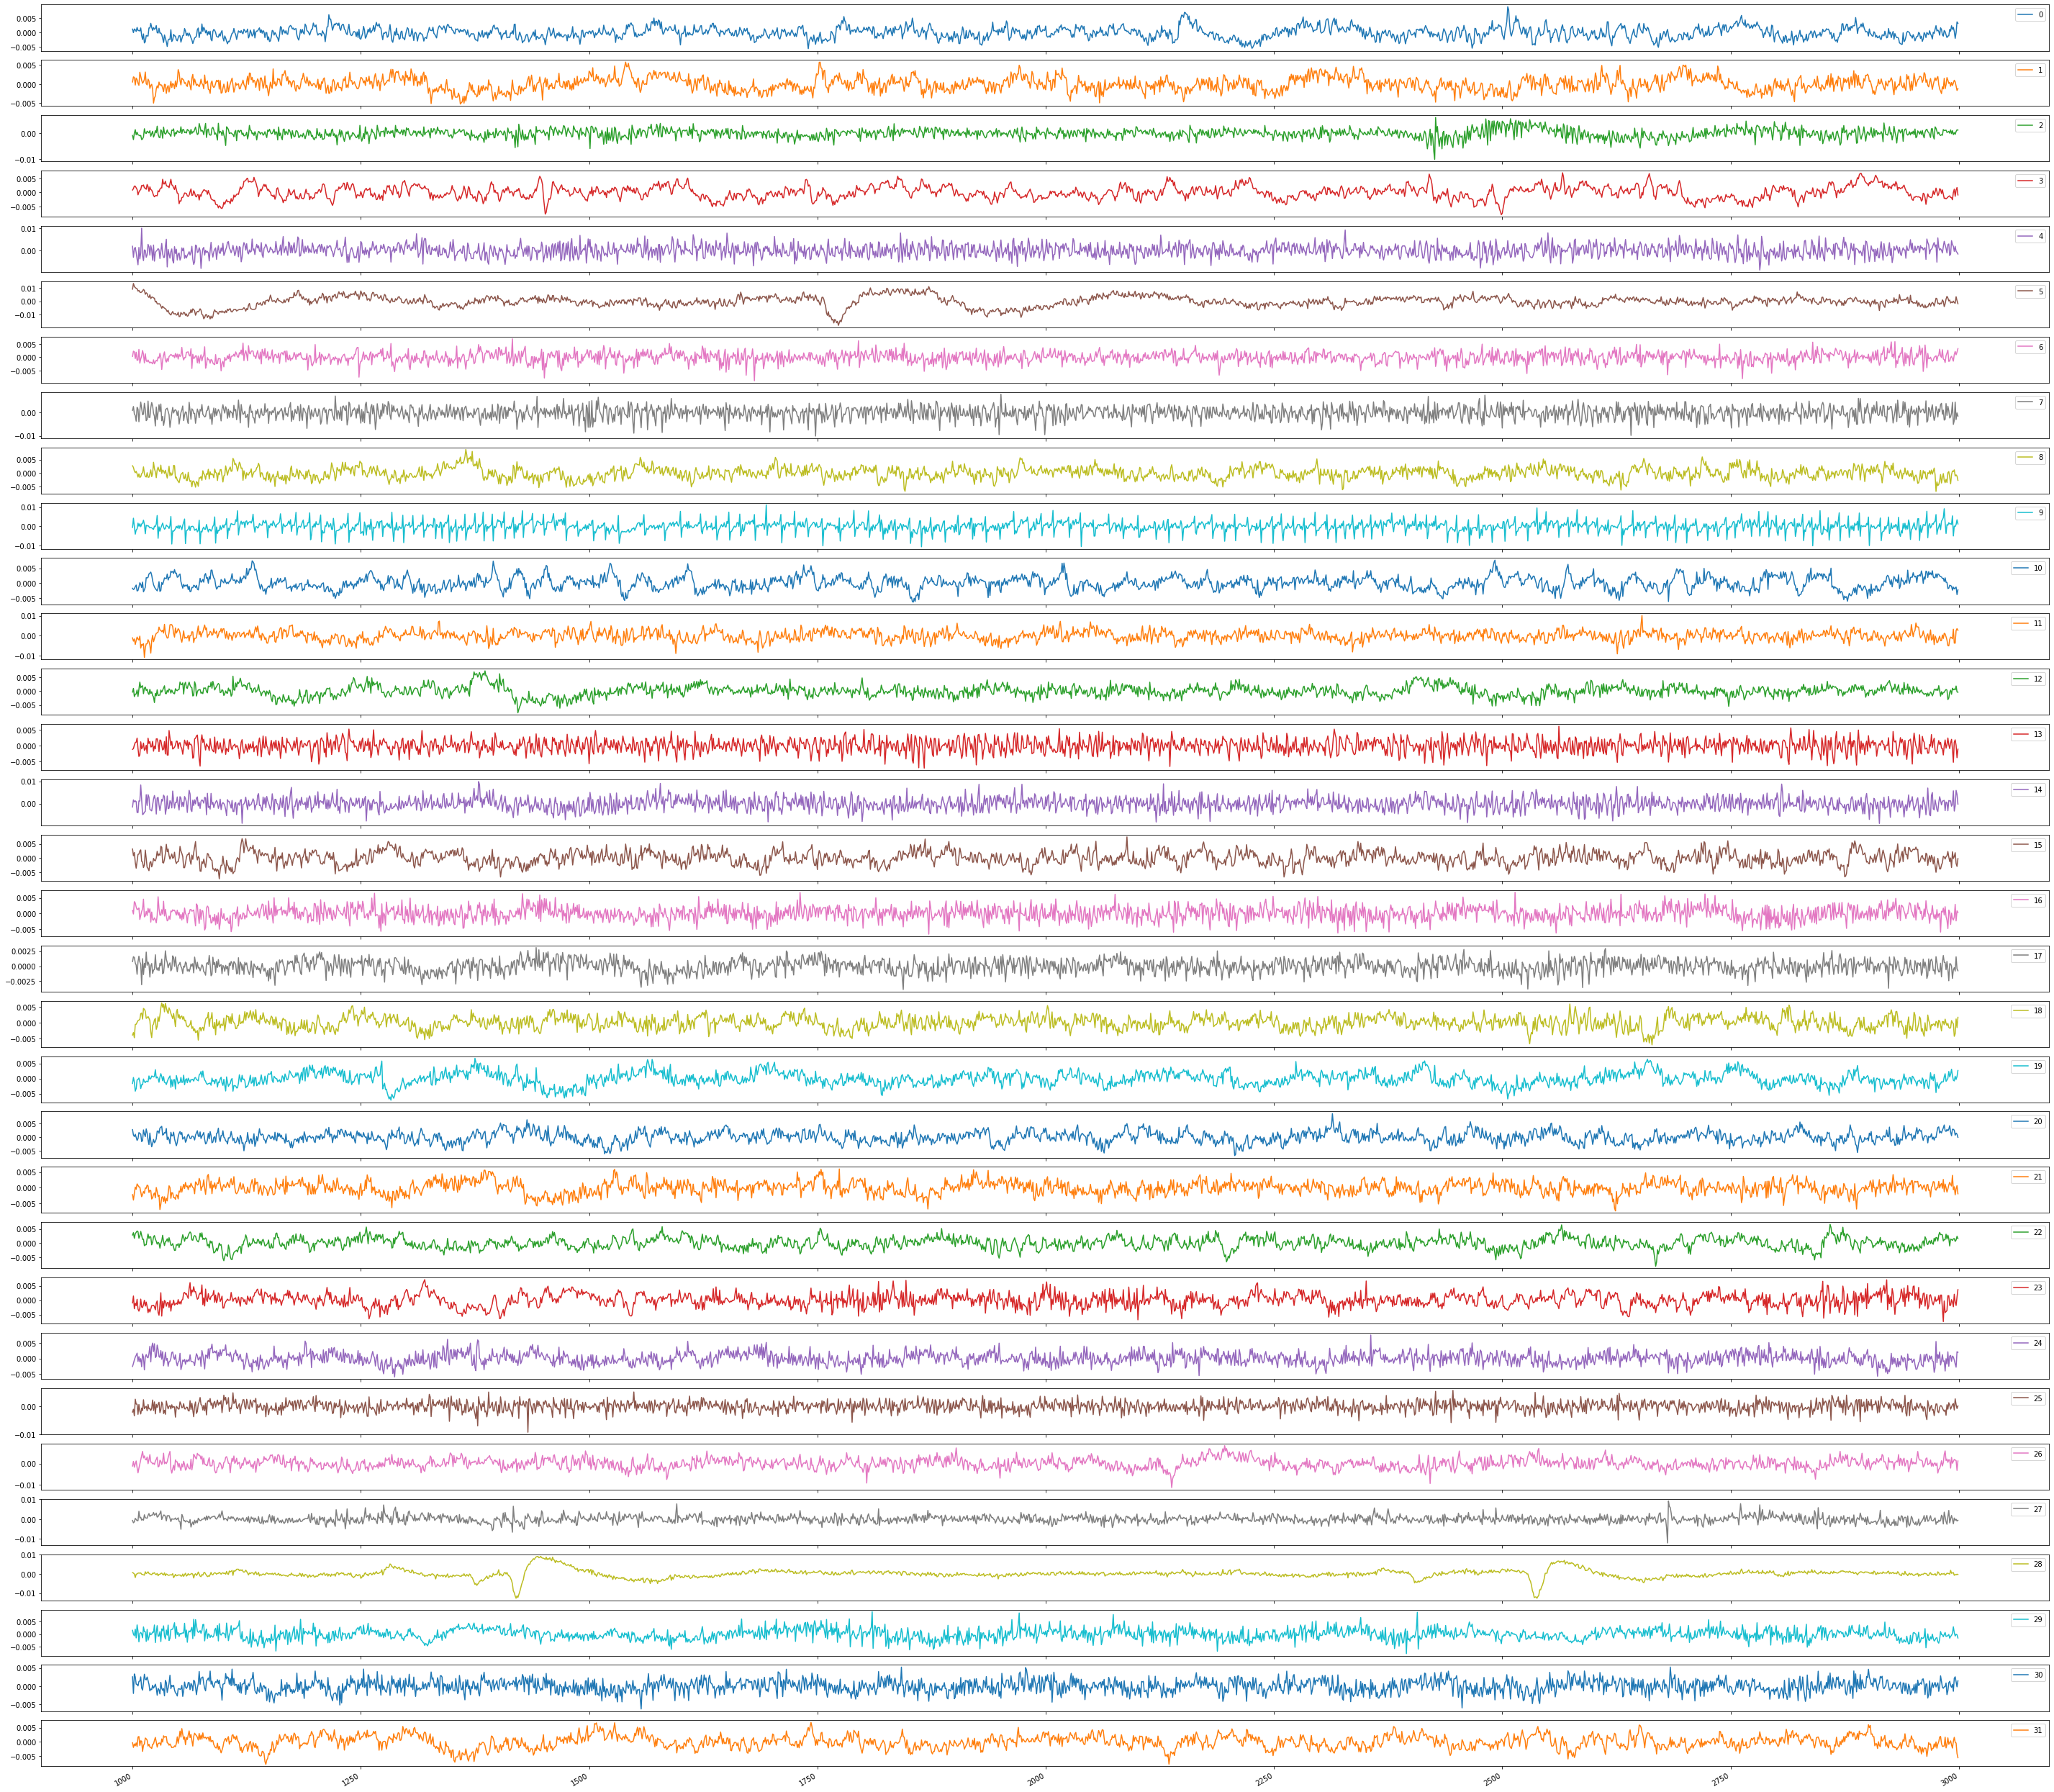

In [7]:
ica = FastICA().fit(x)
indep_sources = ica.transform(x) # applies unmixing matrix to x
indep_sources_df = pd.DataFrame(data=indep_sources)
indep_sources_df.iloc[1000:3000,:].plot(subplots=True, figsize=(50,50))
plt.show()

Remove eyeblink component and rebuild signals 

In [8]:
eyeblink_channel = 28
indep_sources[:, eyeblink_channel] = 0 
x_clean = ica.inverse_transform(indep_sources)

Plot the original vs cleaned data

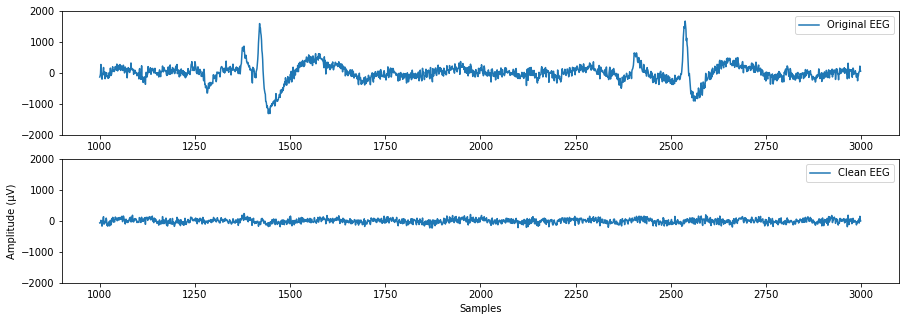

In [20]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(15,5))

ax[0].plot(range(1000,3000), x[1000:3000, 0], label='Original EEG')
ax[0].legend()
ax[0].set_ylim([-2000,2000])

ax[1].plot(range(1000,3000), x_clean[1000:3000, 0], label='Clean EEG')
ax[1].legend()
ax[1].set_ylim([-2000,2000])

plt.ylabel('Amplitude (µV)')
plt.xlabel('Samples')
plt.show()